In [1]:
%cd /home/ubuntu/Qwen-Image-Edit-Angles

/home/ubuntu/Qwen-Image-Edit-Angles


In [2]:
from qwenimage.reporting.datamodels import ExperimentSet
from qwenimage.reporting.visualize_barplot import compare_sets_with_timing

Skipping import of cpp extensions due to incompatible torch version 2.9.1+cu128 for torchao version 0.14.1             Please see https://github.com/pytorch/ao/issues/2919 for more info
TMA benchmarks will be running without grid constant TMA descriptor.
ERROR:bitsandbytes.cextension:Could not load bitsandbytes native library: /lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cpu.so)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/bitsandbytes/cextension.py", line 85, in <module>
    lib = get_native_library()
  File "/usr/local/lib/python3.10/dist-packages/bitsandbytes/cextension.py", line 72, in get_native_library
    dll = ct.cdll.LoadLibrary(str(binary_path))
  File "/usr/lib/python3.10/ctypes/__init__.py", line 452, in LoadLibrary
    return self._dlltype(name)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._ha

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

/home/ubuntu/.local/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.12) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

/usr/lib/python3/dist-packages/sklearn/utils/fixes.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version  # type: ignore


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/ubuntu/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


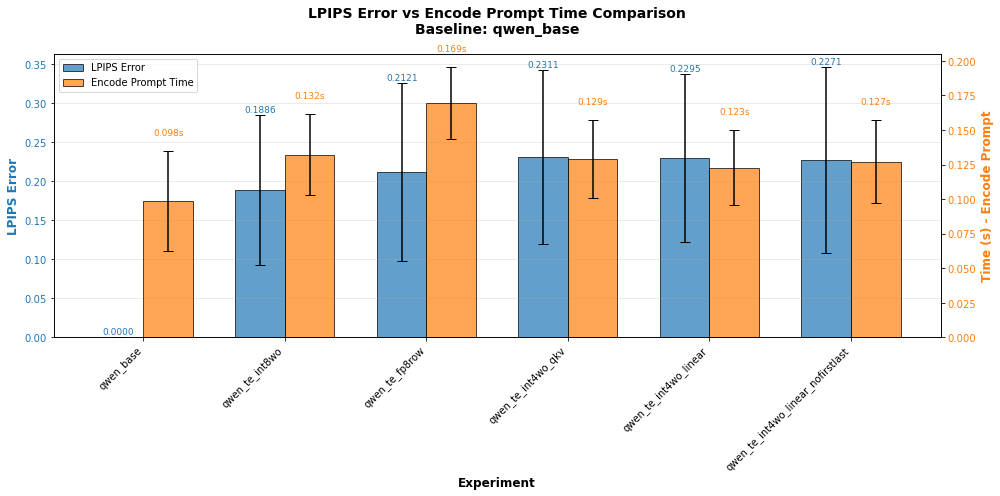

,experiment,lpips_mean,lpips_std,time_mean,time_std
0,qwen_base,0.000000,0.000000,0.098381,0.036231
1,qwen_te_int8wo,0.188574,0.095865,0.132210,0.029275
2,qwen_te_fp8row,0.212102,0.113812,0.169402,0.026132
3,qwen_te_int4wo_qkv,0.231104,0.111931,0.129037,0.028168
4,qwen_te_int4wo_linear,0.229536,0.107802,0.122848,0.027134
5,qwen_te_int4wo_linear_nofirstlast,0.227104,0.119267,0.127067,0.030136


In [5]:
compare_sets_with_timing(
    ExperimentSet.create(
        "qwen_base",
        "qwen_te_int8wo",
        # "qwen_te_int4wo",
        "qwen_te_fp8row",
        "qwen_te_int4wo_qkv",
        "qwen_te_int4wo_linear",
        "qwen_te_int4wo_linear_nofirstlast",
    ),
    profile_target="Encode Prompt",
    sort_by=None,
)



In [3]:
import os
import subprocess
from pathlib import Path
import argparse

import yaml
import diffusers


from wandml.trainers.experiment_trainer import ExperimentTrainer
from wandml import WandDataPipe
import wandml
from wandml import WandAuth
from wandml import utils as wandml_utils
from wandml.trainers.datamodels import ExperimentTrainerParameters
from wandml.trainers.experiment_trainer import ExperimentTrainer


from qwenimage.finetuner import QwenLoraFinetuner
from qwenimage.datasets import StyleSourceWithRandomRef
from qwenimage.task import TextToImageWithRefTask
from qwenimage.datamodels import QwenConfig
from qwenimage.foundation import QwenImageFoundation
from qwenimage.experiments.experiments_qwen import PipeInputs
from qwenimage.models.encode_prompt import encode_prompt
from qwenimage.optimization import simple_quantize_model


In [4]:

config = QwenConfig()
foundation = QwenImageFoundation(config=config, device="cpu")
text_encoder = foundation.text_encoder.to("cuda")

inps = PipeInputs()

self.device='cpu'


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

720 input combinations


In [4]:
text_encoder.state_dict().keys()

odict_keys(['model.visual.patch_embed.proj.weight', 'model.visual.blocks.0.norm1.weight', 'model.visual.blocks.0.norm2.weight', 'model.visual.blocks.0.attn.qkv.weight', 'model.visual.blocks.0.attn.qkv.bias', 'model.visual.blocks.0.attn.proj.weight', 'model.visual.blocks.0.attn.proj.bias', 'model.visual.blocks.0.mlp.gate_proj.weight', 'model.visual.blocks.0.mlp.gate_proj.bias', 'model.visual.blocks.0.mlp.up_proj.weight', 'model.visual.blocks.0.mlp.up_proj.bias', 'model.visual.blocks.0.mlp.down_proj.weight', 'model.visual.blocks.0.mlp.down_proj.bias', 'model.visual.blocks.1.norm1.weight', 'model.visual.blocks.1.norm2.weight', 'model.visual.blocks.1.attn.qkv.weight', 'model.visual.blocks.1.attn.qkv.bias', 'model.visual.blocks.1.attn.proj.weight', 'model.visual.blocks.1.attn.proj.bias', 'model.visual.blocks.1.mlp.gate_proj.weight', 'model.visual.blocks.1.mlp.gate_proj.bias', 'model.visual.blocks.1.mlp.up_proj.weight', 'model.visual.blocks.1.mlp.up_proj.bias', 'model.visual.blocks.1.mlp.dow

In [5]:
text_encoder

Qwen2_5_VLForConditionalGeneration(
  (model): Qwen2_5_VLModel(
    (visual): Qwen2_5_VisionTransformerPretrainedModel(
      (patch_embed): Qwen2_5_VisionPatchEmbed(
        (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
      )
      (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
      (blocks): ModuleList(
        (0-31): 32 x Qwen2_5_VLVisionBlock(
          (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
          (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
          (attn): Qwen2_5_VLVisionAttention(
            (qkv): Linear(in_features=1280, out_features=3840, bias=True)
            (proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (mlp): Qwen2_5_VLMLP(
            (gate_proj): Linear(in_features=1280, out_features=3420, bias=True)
            (up_proj): Linear(in_features=1280, out_features=3420, bias=True)
            (down_proj): Linear(in_features=3420, out_features=1280, bias=True)
            (act_fn): SiLUAc

In [ ]:
base_dir = Path("reports")

In [17]:
import torch


iterations = 32
quant_type = None # "int8wo" "int4wo" "fp8row"
if quant_type:
    simple_quantize_model(text_encoder, quant_type)

all_embeds = []
for i in range(iterations):
    prompt_embeds, prompt_embeds_mask = encode_prompt(
        foundation.text_encoder,
        foundation.pipe.tokenizer,
        inps[i]["prompt"],
        device="cuda",
        dtype=foundation.dtype,
        max_sequence_length = foundation.config.train_max_sequence_length,
    )
    all_embeds.append(prompt_embeds.squeeze(0))
stacked_embd = torch.cat(all_embeds, dim=0)
print(f"{stacked_embd.shape}")
torch.save(stacked_embd, f"{quant_type or 'base'}_stacked_embd_{iterations}.pt")
    

torch.Size([1624, 3584])


In [ ]:
[s.shape for s in all_embeds]

[torch.Size([1, 1, 59, 3584]),
 torch.Size([1, 1, 41, 3584]),
 torch.Size([1, 1, 58, 3584]),
 torch.Size([1, 1, 76, 3584]),
 torch.Size([1, 1, 32, 3584]),
 torch.Size([1, 1, 42, 3584]),
 torch.Size([1, 1, 75, 3584]),
 torch.Size([1, 1, 69, 3584]),
 torch.Size([1, 1, 42, 3584]),
 torch.Size([1, 1, 40, 3584]),
 torch.Size([1, 1, 76, 3584]),
 torch.Size([1, 1, 60, 3584]),
 torch.Size([1, 1, 34, 3584]),
 torch.Size([1, 1, 75, 3584]),
 torch.Size([1, 1, 58, 3584]),
 torch.Size([1, 1, 76, 3584]),
 torch.Size([1, 1, 60, 3584]),
 torch.Size([1, 1, 37, 3584]),
 torch.Size([1, 1, 52, 3584]),
 torch.Size([1, 1, 40, 3584]),
 torch.Size([1, 1, 41, 3584]),
 torch.Size([1, 1, 70, 3584]),
 torch.Size([1, 1, 56, 3584]),
 torch.Size([1, 1, 24, 3584]),
 torch.Size([1, 1, 20, 3584]),
 torch.Size([1, 1, 38, 3584]),
 torch.Size([1, 1, 51, 3584]),
 torch.Size([1, 1, 14, 3584]),
 torch.Size([1, 1, 69, 3584]),
 torch.Size([1, 1, 42, 3584]),
 torch.Size([1, 1, 56, 3584]),
 torch.Size([1, 1, 41, 3584])]

In [18]:
foundation.pipe.tokenizer

Qwen2Tokenizer(name_or_path='/home/ubuntu/.cache/huggingface/hub/models--Qwen--Qwen-Image-Edit-2509/snapshots/d3968ef930e841f4c73640fb8afa3b306a78167e/tokenizer', vocab_size=151643, model_max_length=131072, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'eos_token': '<|im_end|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|object_ref_end|>', '<|box_start|>', '<|box_end|>', '<|quad_start|>', '<|quad_end|>', '<|vision_start|>', '<|vision_end|>', '<|vision_pad|>', '<|image_pad|>', '<|video_pad|>']}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	151643: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	151644: AddedToken("<|im_start|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	151645: AddedToken("<|im_end|>", rstrip=False, lstrip=False, single_word=False, normalized=False, spe

In [19]:
dir(foundation.pipe.tokenizer)

['SPECIAL_TOKENS_ATTRIBUTES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tokens',
 '_added_tokens_decoder',
 '_added_tokens_encoder',
 '_auto_class',
 '_batch_encode_plus',
 '_batch_prepare_for_model',
 '_call_one',
 '_convert_id_to_token',
 '_convert_token_to_id',
 '_convert_token_to_id_with_added_voc',
 '_create_repo',
 '_decode',
 '_decode_use_source_tokenizer',
 '_encode_plus',
 '_eventual_warn_about_too_long_sequence',
 '_eventually_correct_t5_max_length',
 '_from_pretrained',
 '_get_files_timestamps',
 '_get_padding_truncation_strategies',
 '_in_target_context_manager',
 '_pad',
 '_pad_token_

In [6]:
import torch

import torch.nn.functional as F
import torchvision.transforms.v2 as T
import torch

_transforms = T.Compose([
    T.ToImage(),
    T.RGB(),
    T.ToDtype(torch.float32, scale=True), # [0,1]
])


iterations = 32
quant_type = None # "int8wo" "int4wo" "fp8row"
if quant_type:
    simple_quantize_model(text_encoder, quant_type)

all_embeds = []
for i in range(iterations):
    prompt_embeds, prompt_embeds_mask = foundation.pipe.encode_prompt(
        inps[i]["prompt"],
        _transforms(inps[i]["image"][0]).mul(255),
        device="cuda",
        # dtype=foundation.dtype,
        max_sequence_length = foundation.config.train_max_sequence_length,
    )
    all_embeds.append(prompt_embeds.squeeze(0))
stacked_embd = torch.cat(all_embeds, dim=0)
print(f"{stacked_embd.shape}")
torch.save(stacked_embd, f"{quant_type or 'base'}_stacked_embd_{iterations}.pt")
    

_get_qwen_prompt_embeds, image
Shape: (3, 683, 1024)
Min: 0.0, Max: 255.0, Mean: 63.53046417236328
Device: cpu, Dtype: torch.float32, Requires Grad: False
{'input_ids': tensor([[151644,   8948,    198,  ..., 151644,  77091,    198]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[-1.7777, -1.7632, -1.7631,  ..., -0.5286, -0.6148, -0.7006],
        [-1.7381, -1.7182, -1.7566,  ..., -0.9265, -0.9171, -0.9117],
        [-1.7631, -1.7485, -1.7555,  ..., -0.4396, -0.4960, -0.5632],
        ...,
        [-1.6908, -1.7087, -1.7196,  ..., -0.5421, -0.5706, -0.5549],
        [-1.7173, -1.7147, -1.6992,  ..., -0.7265, -0.7266, -0.7266],
        [-1.7319, -1.7304, -1.7315,  ..., -0.6268, -0.6268, -0.5985]],
       device='cuda:0'), 'image_grid_thw': tensor([[ 1, 48, 74]], device='cuda:0')}
_get_qwen_prompt_embeds, model_inputs.pixel_values
Shape: (3552, 1176)
Min: -1.8659758567810059, Max: 2.1775243282318115, Mean: -0.74940

encode_prompt, prompt_embeds
Shape: (1, 1047, 3584)
Min: -179.0, Max: 126.0, Mean: -0.099609375
Device: cuda:0, Dtype: torch.bfloat16, Requires Grad: False
Time taken by QwenImageEditPlusPipeline.encode_prompt: 0.2631705839885399 seconds
_get_qwen_prompt_embeds, image
Shape: (3, 768, 1024)
Min: 0.0, Max: 255.0, Mean: 107.94649505615234
Device: cpu, Dtype: torch.float32, Requires Grad: False
{'input_ids': tensor([[151644,   8948,    198,  ..., 151644,  77091,    198]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[ 0.5428,  0.5998,  0.6863,  ...,  0.8736,  0.9324,  0.9669],
        [ 0.7459,  0.6964,  0.6597,  ...,  0.7373,  0.6676,  0.6491],
        [-0.1431, -0.0794, -0.0050,  ...,  1.0617,  1.0885,  1.0392],
        ...,
        [-1.1572, -1.0803, -0.8879,  ..., -0.9471, -1.0033, -1.0551],
        [-0.3540, -0.3737, -0.3771,  ...,  0.5403,  0.6746,  0.5794],
        [-0.5961, -0.6764, -0.7813,  ...,  0.2935,  

[Image([[[0.0039, 0.0078, 0.0078,  ..., 0.0118, 0.0118, 0.0118],
         [0.0039, 0.0078, 0.0078,  ..., 0.0118, 0.0118, 0.0118],
         [0.0039, 0.0078, 0.0078,  ..., 0.0118, 0.0118, 0.0157],
         ...,
         [0.0588, 0.0588, 0.0588,  ..., 0.0275, 0.0235, 0.0235],
         [0.0549, 0.0549, 0.0549,  ..., 0.0275, 0.0235, 0.0235],
         [0.0510, 0.0510, 0.0510,  ..., 0.0275, 0.0235, 0.0235]],
 
        [[0.1647, 0.1686, 0.1686,  ..., 0.1490, 0.1490, 0.1490],
         [0.1647, 0.1686, 0.1686,  ..., 0.1490, 0.1490, 0.1490],
         [0.1647, 0.1686, 0.1686,  ..., 0.1490, 0.1529, 0.1569],
         ...,
         [0.1961, 0.1961, 0.1961,  ..., 0.1294, 0.1294, 0.1294],
         [0.1922, 0.1922, 0.1922,  ..., 0.1294, 0.1294, 0.1294],
         [0.1882, 0.1882, 0.1882,  ..., 0.1294, 0.1294, 0.1294]],
 
        [[0.2902, 0.2941, 0.2941,  ..., 0.2588, 0.2588, 0.2588],
         [0.2902, 0.2941, 0.2941,  ..., 0.2588, 0.2588, 0.2588],
         [0.2902, 0.2941, 0.2941,  ..., 0.2588, 0.2549, 